In [3]:
!pip install imutils

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from imutils import paths

In [8]:
image_paths = list(paths.list_images('datasets/animals/'))

In [10]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

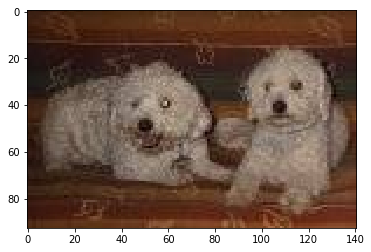

In [13]:
image = cv2.imread(image_paths[674])
plt.figure()
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [30]:
data = []
labels = []

In [15]:
import random

In [16]:
random.shuffle(image_paths)

In [20]:
p = 'datasets/animals/panda/panda_0001.jpg'
print(p.split('/'))
print(p.split('/')[-2])

['datasets', 'animals', 'panda', 'panda_0001.jpg']
panda


In [31]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    label = image_path.split('/')[-2]
    data.append(image)
    labels.append(label)

In [32]:
data[2].shape

(32, 32, 3)

In [34]:
import numpy as np

In [35]:
data = np.array(data)
labels = np.array(labels)

In [37]:
data[0].shape

(32, 32, 3)

In [36]:
data.shape

(3000, 32, 32, 3)

In [38]:
32*32*3

3072

In [39]:
data = data.reshape((3000, 3072))

In [40]:
data.shape

(3000, 3072)

In [41]:
data[0]

array([ 57,  99,  80, ..., 230, 254, 253], dtype=uint8)

In [42]:
data = data / 255.0

In [43]:
data[0]

array([0.22352941, 0.38823529, 0.31372549, ..., 0.90196078, 0.99607843,
       0.99215686])

In [44]:
labels[0]

'panda'

In [45]:
labels

array(['panda', 'panda', 'panda', ..., 'cats', 'dogs', 'panda'],
      dtype='<U5')

In [46]:
from sklearn.preprocessing import LabelBinarizer

In [47]:
lb = LabelBinarizer()

In [48]:
labels = lb.fit_transform(labels)

In [49]:
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [50]:
lb.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [59]:
y = np.array([0, 1, 0])

In [66]:
lb.inverse_transform(np.array([[0.1, 0.7, 0.2]]))

array(['dogs'], dtype='<U5')

In [67]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=5
)

In [113]:
X_train.shape

(2400, 3072)

In [115]:
y_train.shape

(2400, 3)

In [116]:
print(X_test.shape, y_test.shape)

(600, 3072) (600, 3)


In [117]:
# import
from sklearn.neural_network import MLPClassifier

In [119]:
# instantiate
mlp = MLPClassifier()

In [120]:
# fit
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [124]:
# predict
y_pred = mlp.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, classification_report

In [125]:
accuracy_score(y_test, y_pred)

0.4666666666666667

In [128]:
print(classification_report(y_test, y_pred, target_names=lb.classes_))

             precision    recall  f1-score   support

       cats       0.48      0.71      0.57       191
       dogs       0.62      0.10      0.17       208
      panda       0.80      0.71      0.75       201

avg / total       0.64      0.50      0.49       600

